In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pwd

'/Users/yunkihun/data-science/kihun'

In [50]:
df = pd.read_csv("../data/events.csv")

In [4]:
df.shape

(481999, 9)

In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2.140000e+18,electronics.telephone,NaN,31.90,1.520000e+18,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2.140000e+18,computers.components.cooler,zalman,17.16,1.520000e+18,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2.140000e+18,NaN,NaN,9.81,1.520000e+18,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2.140000e+18,computers.peripherals.printer,pantum,113.81,1.520000e+18,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2.140000e+18,NaN,cameronsino,15.87,1.520000e+18,aa4mmk0kwQ


In [6]:
columns = df.columns

In [7]:
df_table = pd.DataFrame({
    'column' : [],
    'column_type' : [],
    'column_unique' : []
})

columns = df.columns

for i in range(len(columns)):
    df_table.loc[i] = [columns[i], df[columns[i]].dtype, df[columns[i]].nunique()]
    
df_table

,column,column_type,column_unique
0,event_time,object,460681
1,event_type,object,3
2,product_id,int64,44732
3,category_id,float64,6
4,category_code,object,107
5,brand,object,965
6,price,float64,11528
7,user_id,float64,1
8,user_session,object,278520


In [8]:
df.isna().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    138625
brand            119869
price                 0
user_id               0
user_session        132
dtype: int64

In [ ]:
# null에는 특별한 의미가 없어 보이는데 빼기에는 너무 양이 많음 ->

In [ ]:
# 1개의 값만 갖고 있는 user_id, 정확한 의미를 알 수 없는 user_session는 큰 의미를 찾기 어려워 보인다.
# 주요 컬럼을 그래프로 그려보자

In [51]:
# event_time이 너무 커서 렉이 걸리는 것 같다.. 구간화를 시켜보자
df['event_time'].unique()
df['event_time'] = df['event_time'].str[:10]
df['event_time']

0         2020-09-24
1         2020-09-24
2         2020-09-24
3         2020-09-24
4         2020-09-24
             ...    
481994    2020-12-21
481995    2020-12-21
481996    2020-12-21
481997    2020-12-21
481998    2020-12-21
Name: event_time, Length: 481999, dtype: object

<Axes: xlabel='event_time', ylabel='count'>

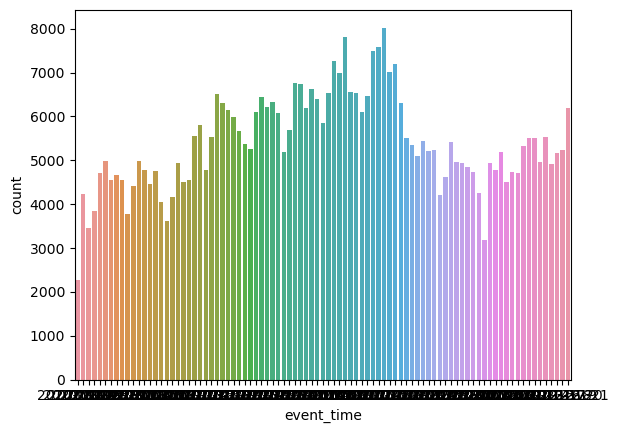

In [19]:
sns.countplot(data=df, x="event_time")

<Axes: title={'center': 'Event Type'}, xlabel='event_type', ylabel='count'>

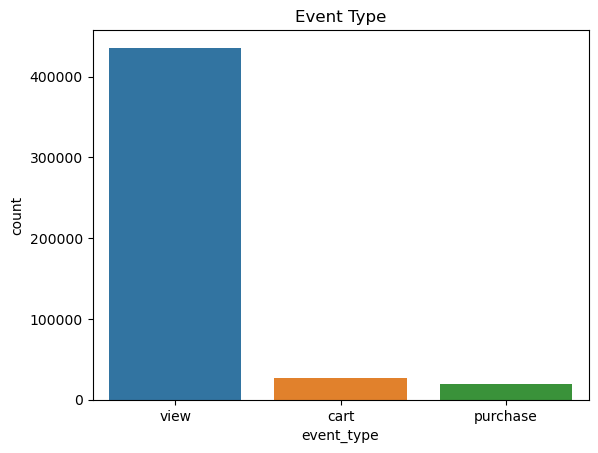

In [10]:
plt.title("Event Type")
sns.countplot(data=df, x="event_type")

# event_type에서는 purchase가 매우 중요해보인다.

<Axes: title={'center': 'Category'}, xlabel='category_id', ylabel='count'>

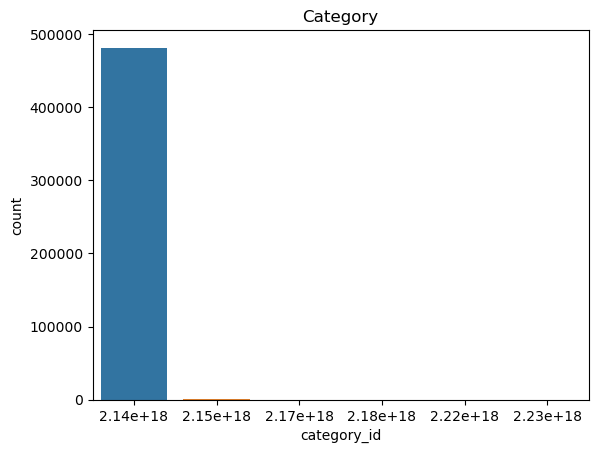

In [12]:
plt.title("Category")
sns.countplot(data=df, x="category_id")

# 뭔지는 잘 모르겠으나 첫번째 컬럼이 엄청 많은 항목을 차지하고 있다.

<Axes: title={'center': 'Category Code'}, xlabel='category_code', ylabel='count'>

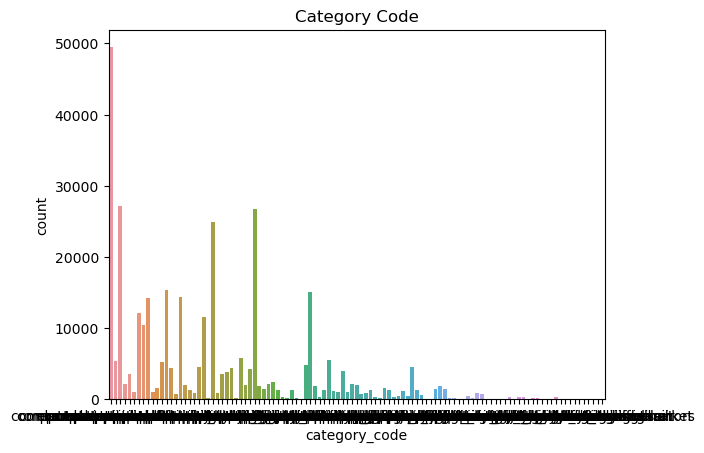

In [14]:
plt.title("Category Code")
sns.countplot(data=df, x="category_code")

<Axes: xlabel='price'>

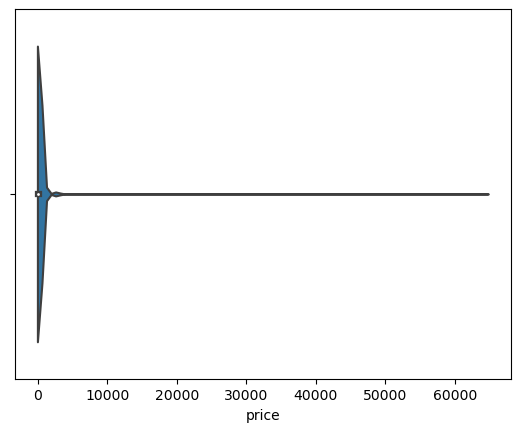

In [16]:
sns.violinplot(data=df, x="price")

<Axes: xlabel='price'>

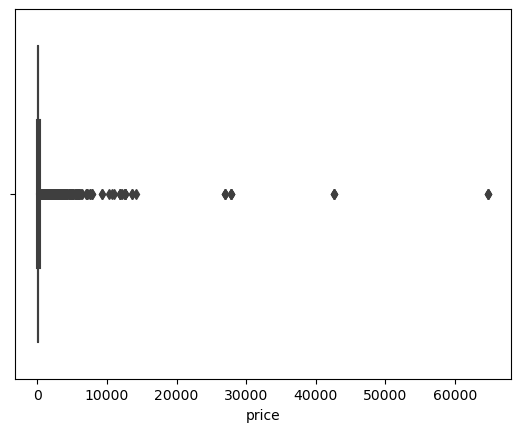

In [18]:
sns.boxplot(data=df, x='price')

# 특정 구간에 엄청 몰려 있으며 이상치가 존재하는 것을 알 수 있다.

/Users/yunkihun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


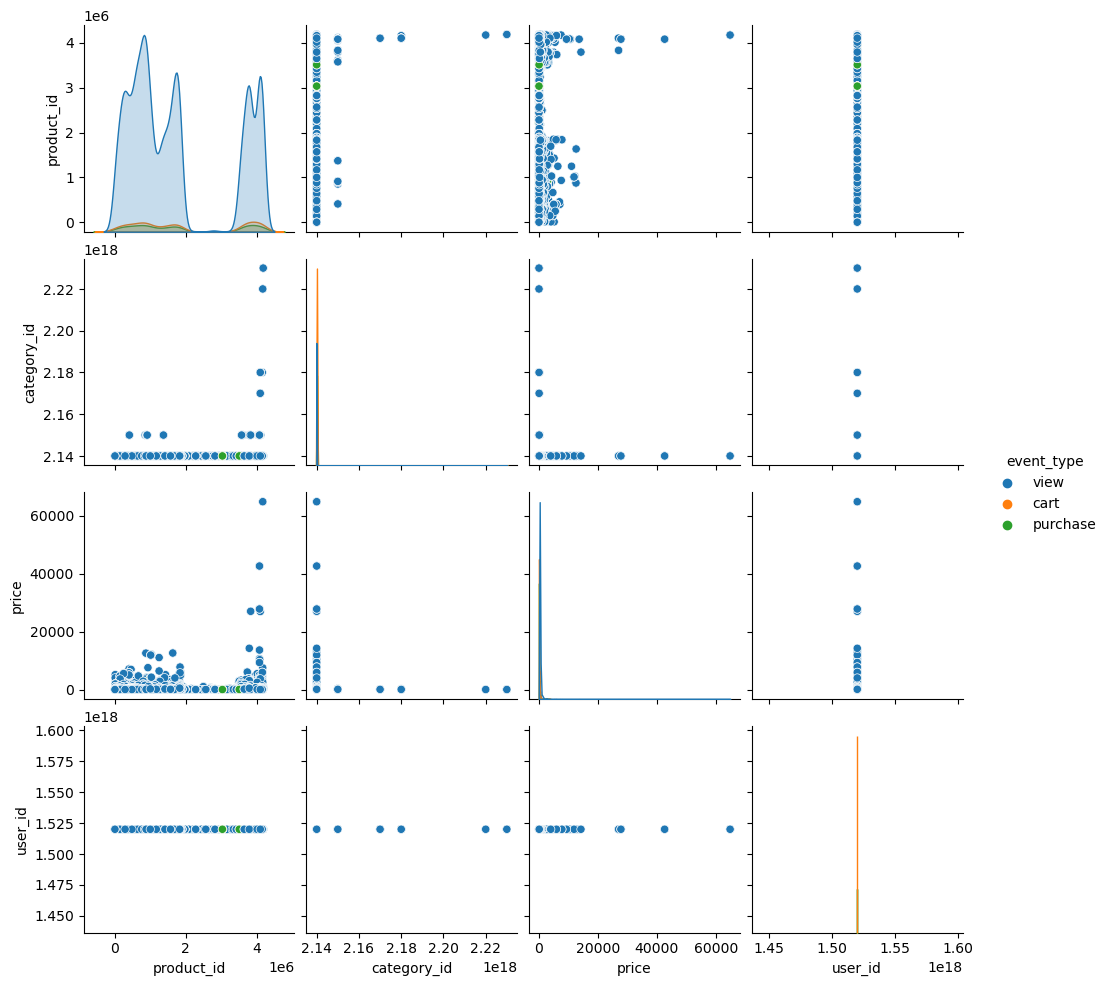

In [21]:
# event_time, event_type, product_id, category_id, category_code, brand, price의 관계를 추정해보자
sns.pairplot(df, hue='event_type')

In [35]:
#cart와 purchase의 관계를 알아보자. cart에 담은 것은 실제로 많이 구매했을까?

cart = df.loc[df['event_type'] == 'cart', 'product_id'].to_list()
purchase = df.loc[df['event_type'] == 'purchase', 'product_id'].to_list()

num = 0

for i in range(len(purchase)):
    if purchase[i] in cart:
        num = num + 1
        
print(f'cart & purchase : {num} / purchase : {len(purchase)}')

cart & purchase : 19144 / purchase : 19247


<Axes: title={'center': 'event time and event type'}, xlabel='event_time', ylabel='count'>

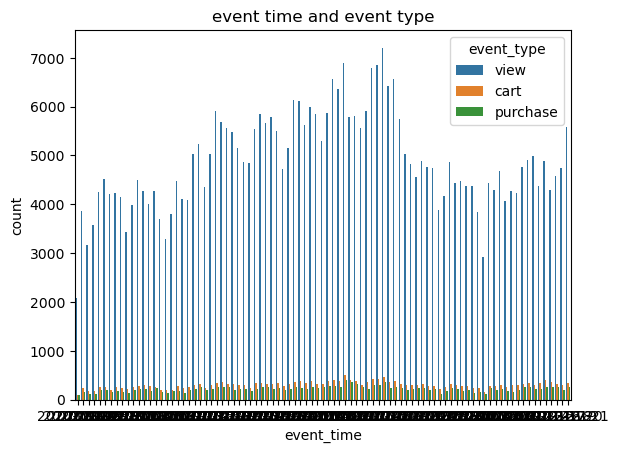

In [22]:
# 가장 중요한 것은 결국 purchase로 이어져야 하는 것 아닐까 하여 purchase와 다른 변수들 간의 관계를 알아보자

plt.title("event time and event type")
sns.countplot(data=df, x='event_time', hue='event_type')

In [60]:
# category_code에 따라 price 군집화 시켰는데 어디에 쓸지 생각이 안나서 한번 더 고민해보기

price_average_per_category_code = df.groupby("category_code")['price'].mean()
df_price_per_category_code = pd.DataFrame(price_average_per_category_code).reset_index()
df_price_per_category_code

,category_code,price
0,accessories.bag,54.443838
1,accessories.briefcase,10.475000
2,apparel.glove,11.079737
3,appliances.environment.air_heater,56.388964
4,appliances.environment.fan,25.308372
...,...,...
102,sport.bicycle,302.274941
103,stationery.battery,16.185903
104,stationery.cartrige,53.115548
105,stationery.paper,25.919369


In [42]:
# 넘어가기

#df_price_per_category_code_merged = pd.merge(df, df_price_per_category_code, on='category_code')
#df_price_per_category_code_merged

,event_time,event_type,product_id,category_id,category_code,brand,price_x,user_id,user_session,price_per_category_code,price_y
0,2020-09-24,view,1996170,2.140000e+18,electronics.telephone,NaN,31.90,1.520000e+18,LJuJVLEjPT,NaN,73.727905
1,2020-09-24,view,758525,2.140000e+18,electronics.telephone,NaN,1.57,1.520000e+18,4xoRmrunYk,NaN,73.727905
2,2020-09-24,view,758525,2.140000e+18,electronics.telephone,NaN,1.57,1.520000e+18,7EXOvzUS35,NaN,73.727905
3,2020-09-24,view,3149184,2.140000e+18,electronics.telephone,flexis,6.97,1.520000e+18,t5aw8VKVBj,NaN,73.727905
4,2020-09-24,view,1417423,2.140000e+18,electronics.telephone,sirius,9.21,1.520000e+18,hbCbCVCiiR,NaN,73.727905
...,...,...,...,...,...,...,...,...,...,...,...
343369,2020-12-09,view,4156082,2.140000e+18,furniture.bedroom.blanket,sanitas,88.25,1.520000e+18,weNT5XPEBG,NaN,89.629412
343370,2020-12-09,view,4156082,2.140000e+18,furniture.bedroom.blanket,sanitas,88.25,1.520000e+18,weNT5XPEBG,NaN,89.629412
343371,2020-12-13,view,4051758,2.140000e+18,furniture.bedroom.blanket,beurer,92.94,1.520000e+18,1A8wIPQAzj,NaN,89.629412
343372,2020-12-13,view,4051758,2.140000e+18,furniture.bedroom.blanket,beurer,92.94,1.520000e+18,1A8wIPQAzj,NaN,89.629412


In [52]:
df_view = df[df['event_type'] == 'view']
df_view.sample(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
402232,2020-12-06,view,4155168,2.140000e+18,electronics.tablet,xiaomi,40.63,1.520000e+18,mgFaAMDzgA


In [54]:
df_purchase = df[df['event_type'] == 'purchase']
df_purchase.sample(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
133707,2020-10-22,purchase,640617,2.140000e+18,computers.peripherals.printer,NaN,17.49,1.520000e+18,frHnfgKV99


<Axes: xlabel='price', ylabel='Count'>

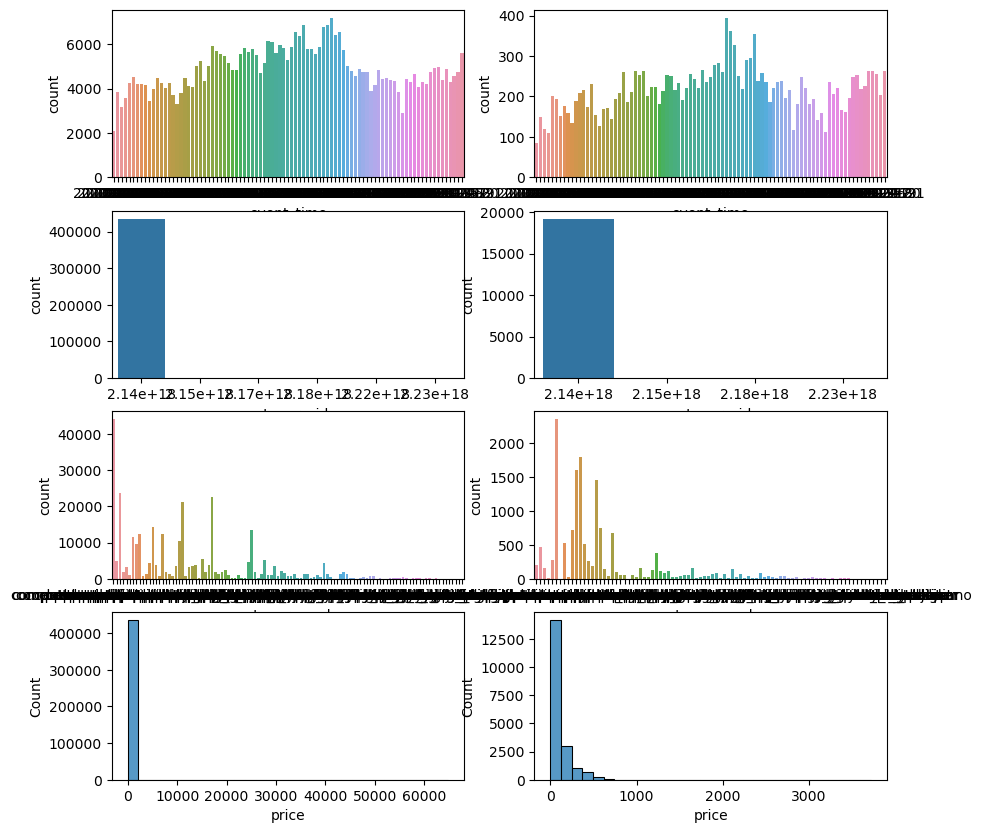

In [64]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

sns.countplot(data=df_view, x='event_time', ax=ax[0,0])
sns.countplot(data=df_purchase, x='event_time', ax=ax[0,1])
sns.countplot(data=df_view, x='category_id', ax=ax[1,0])
sns.countplot(data=df_purchase, x='category_id', ax=ax[1,1])
sns.countplot(data=df_view, x='category_code', ax=ax[2,0])
sns.countplot(data=df_purchase, x='category_code', ax=ax[2,1])
sns.histplot(data=df_view, x='price', bins=30, ax=ax[3,0])
sns.histplot(data=df_purchase, x='price', bins=30, ax=ax[3,1])

In [70]:
df_view['price'].max()
df_purchase['price'].max()

3717.65

In [ ]:
## 탐구 결과
1. cart에 담으면 purchase 확률이 상당히 높다.
2. event_time에 따라 구매 여부가 조금 더 분산이 큰 것으로 보인다.
3. 카테고리별 purchase는 code 기준으로 실제 구매하는 카테고리와 view 카테고리가 조금 차이가 있는 것으로 보이는데 단순히 보기만 하는 특정 카테고리들이 있는 것 같다.
4. 가격별 purchase는 view가 상당히 비정상적으로 나오는데 엄청 가격이 큰 이상치가 있는 것으로 보여서 이 부분을 처리할 필요가 있어 보인다.

## 분석 아이디어

1. view only와 purchase 분류 모델링 (즉, 누가 실제로 구매하는가?)
2. 